<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House price prediction

In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(style="white", color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/house price prediction data.csv")

In [4]:
data.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [5]:
data.shape

(4600, 18)

In [6]:
data.columns.to_list()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
data.drop(columns='date', inplace=True)

In [9]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [10]:
data.shape

(4600, 17)

In [11]:
data.isna().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
sqft_above,0


In [12]:
data.dtypes

,0
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
sqft_above,int64


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


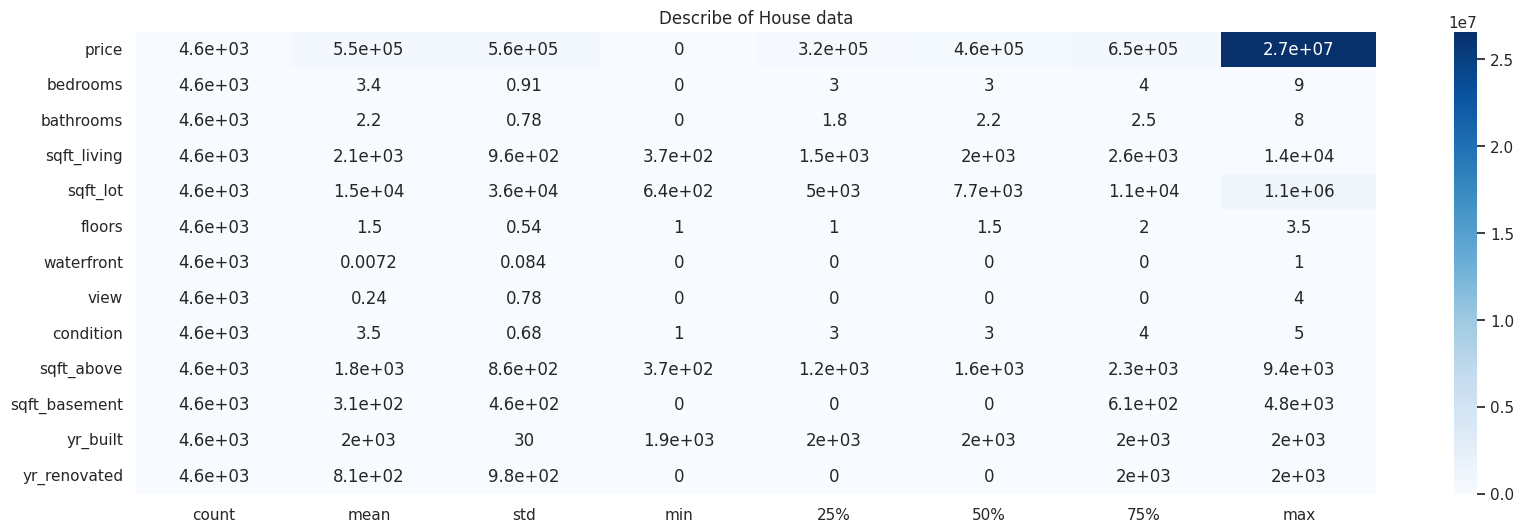

In [14]:
plt.figure(figsize=(20,6))
sns.heatmap(data.describe().T,cmap='Blues' , annot=True)
plt.title('Describe of House data')
plt.show()

In [15]:
numerical_columns=data.select_dtypes(include=['number'])

In [16]:
numerical_columns.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


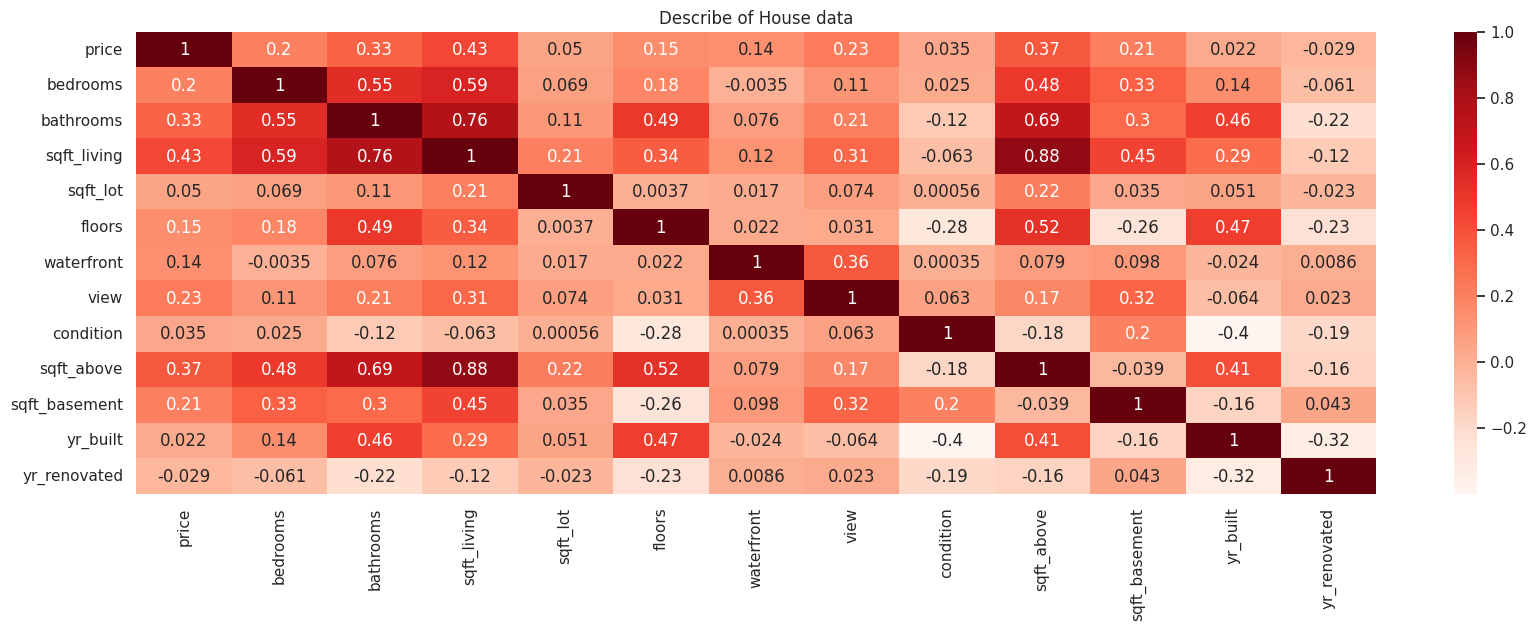

In [17]:
plt.figure(figsize=(20,6))
sns.heatmap(numerical_columns.corr(), cmap='Reds' , annot=True)
plt.title('Describe of House data')
plt.show()

In [18]:
numerical_columns.shape

(4600, 13)

In [19]:
colnames_numerical_columns = numerical_columns.columns
num_cols = len(colnames_numerical_columns)
cols_per_row = 4
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Round up to ensure all plots fit

palette = sns.color_palette("husl", cols_per_row * num_rows)

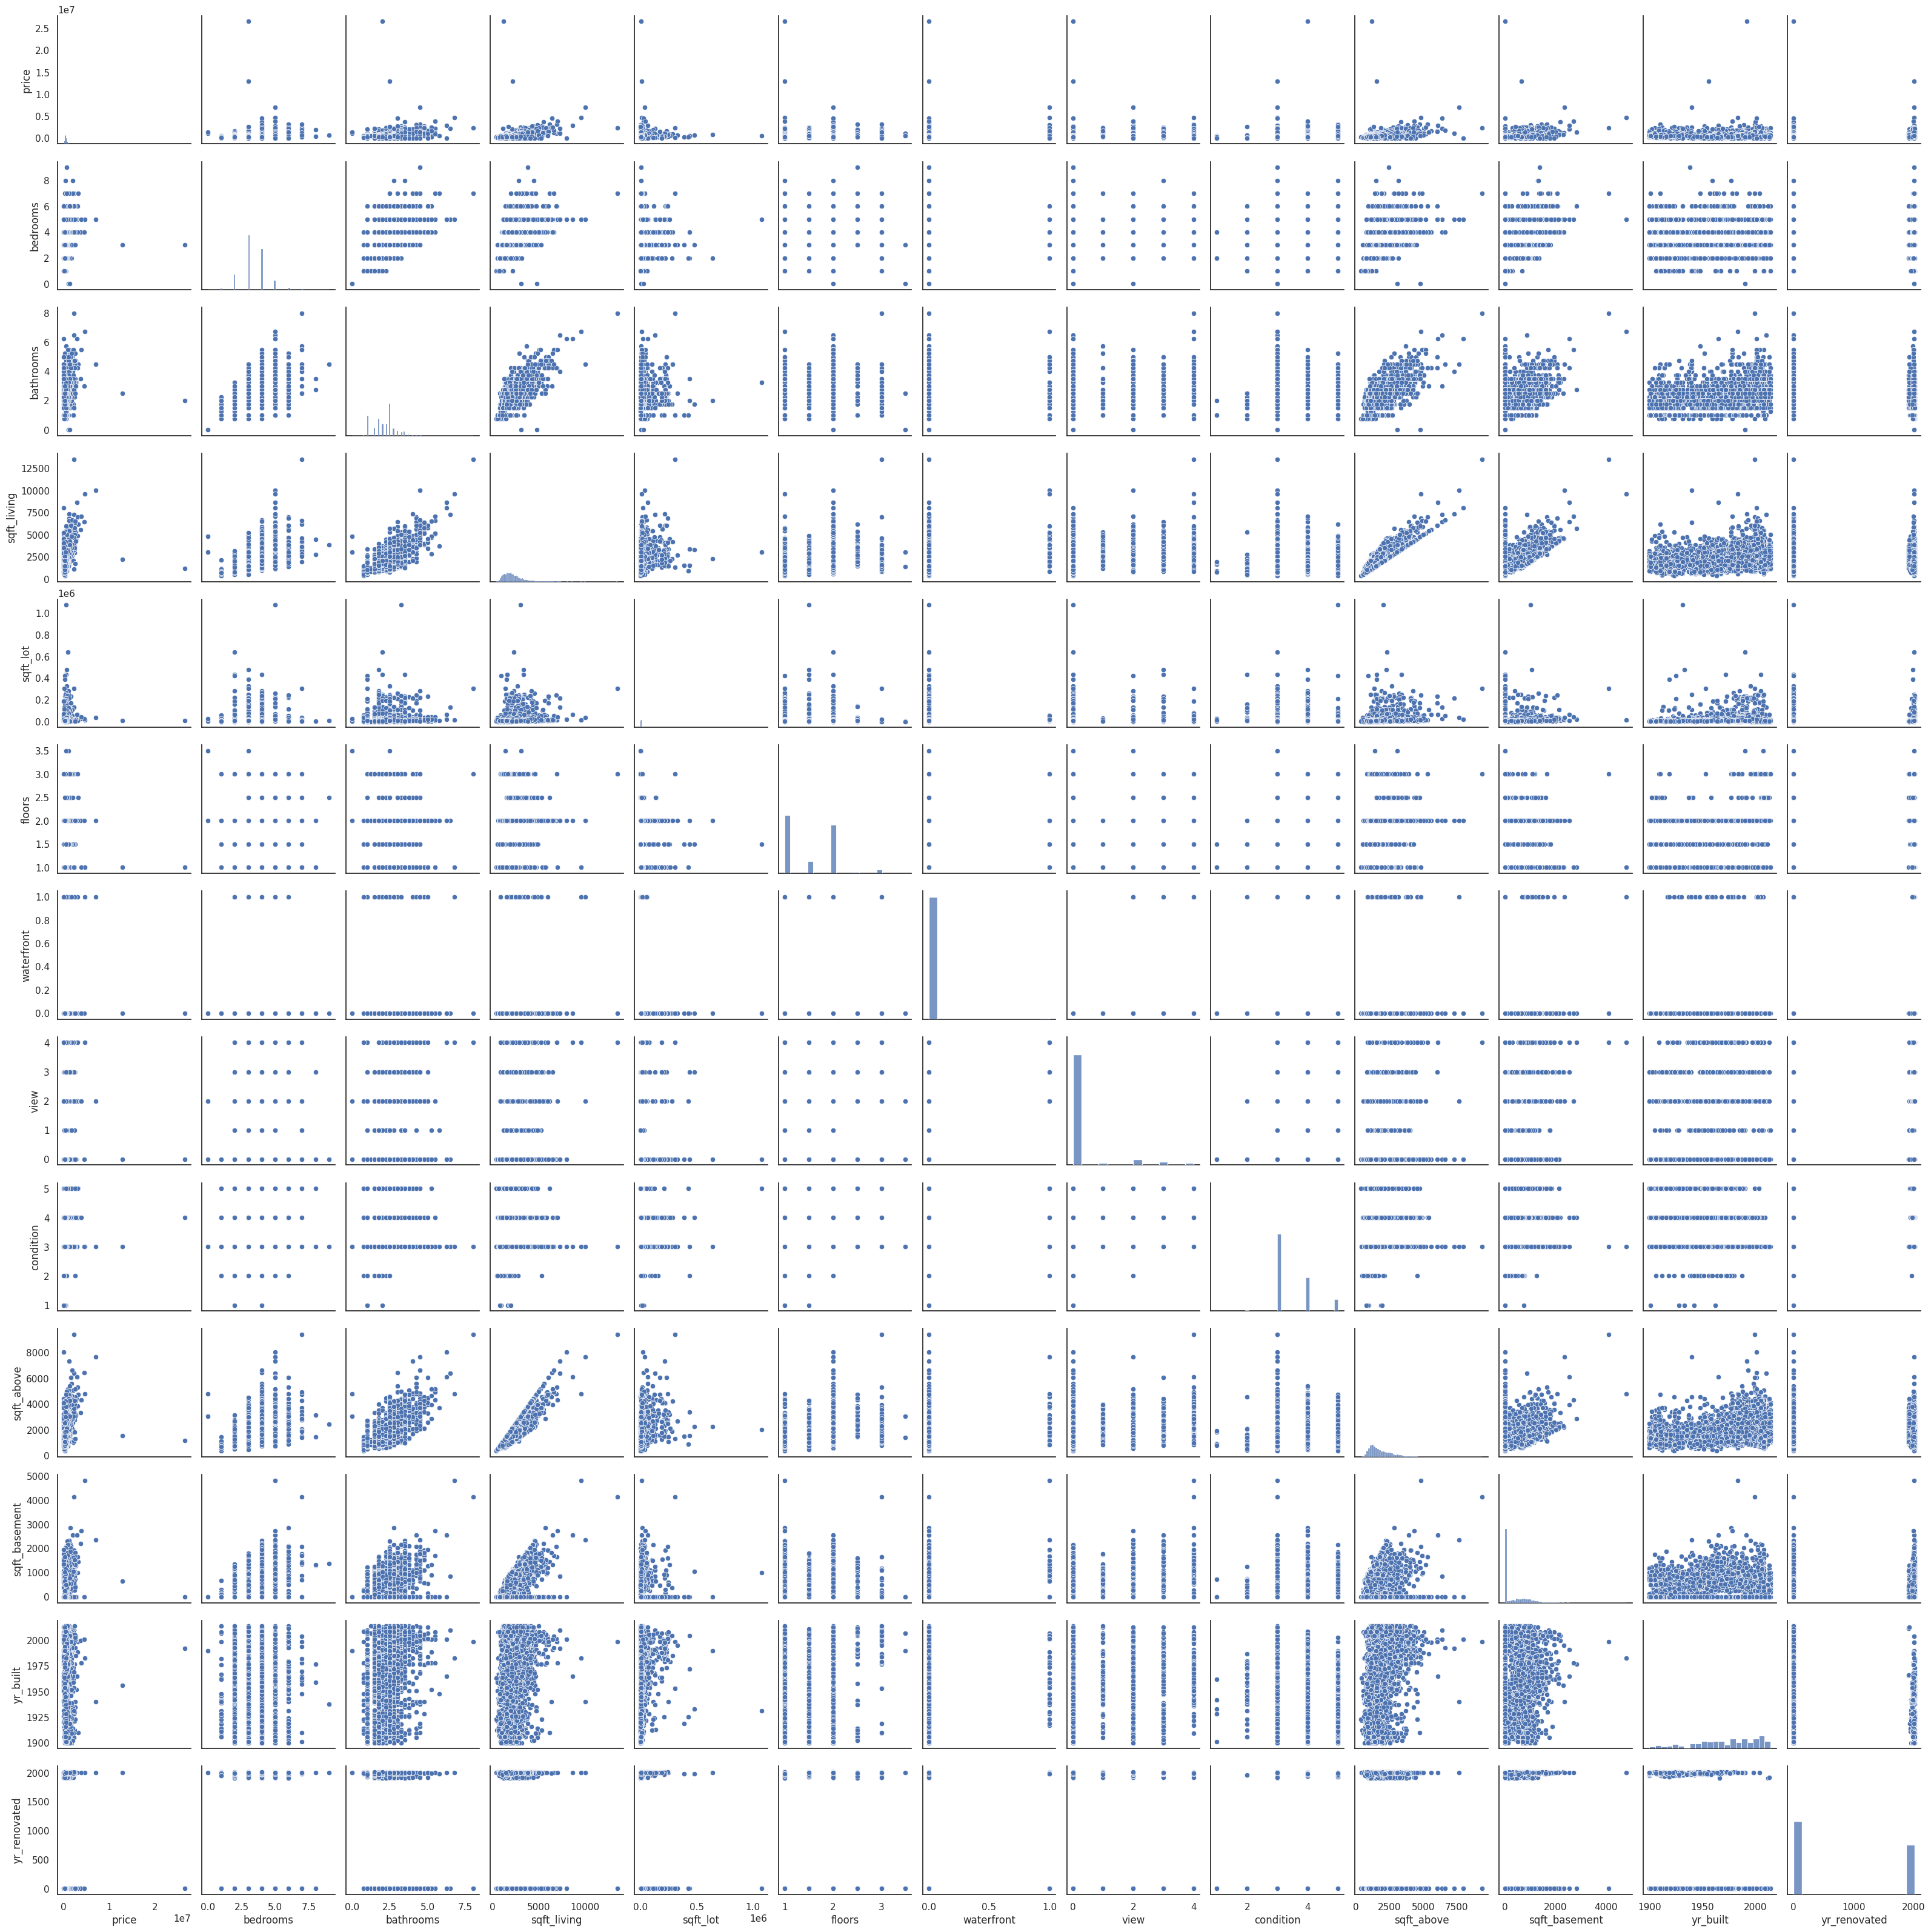

In [20]:
sns.pairplot(data[colnames_numerical_columns])

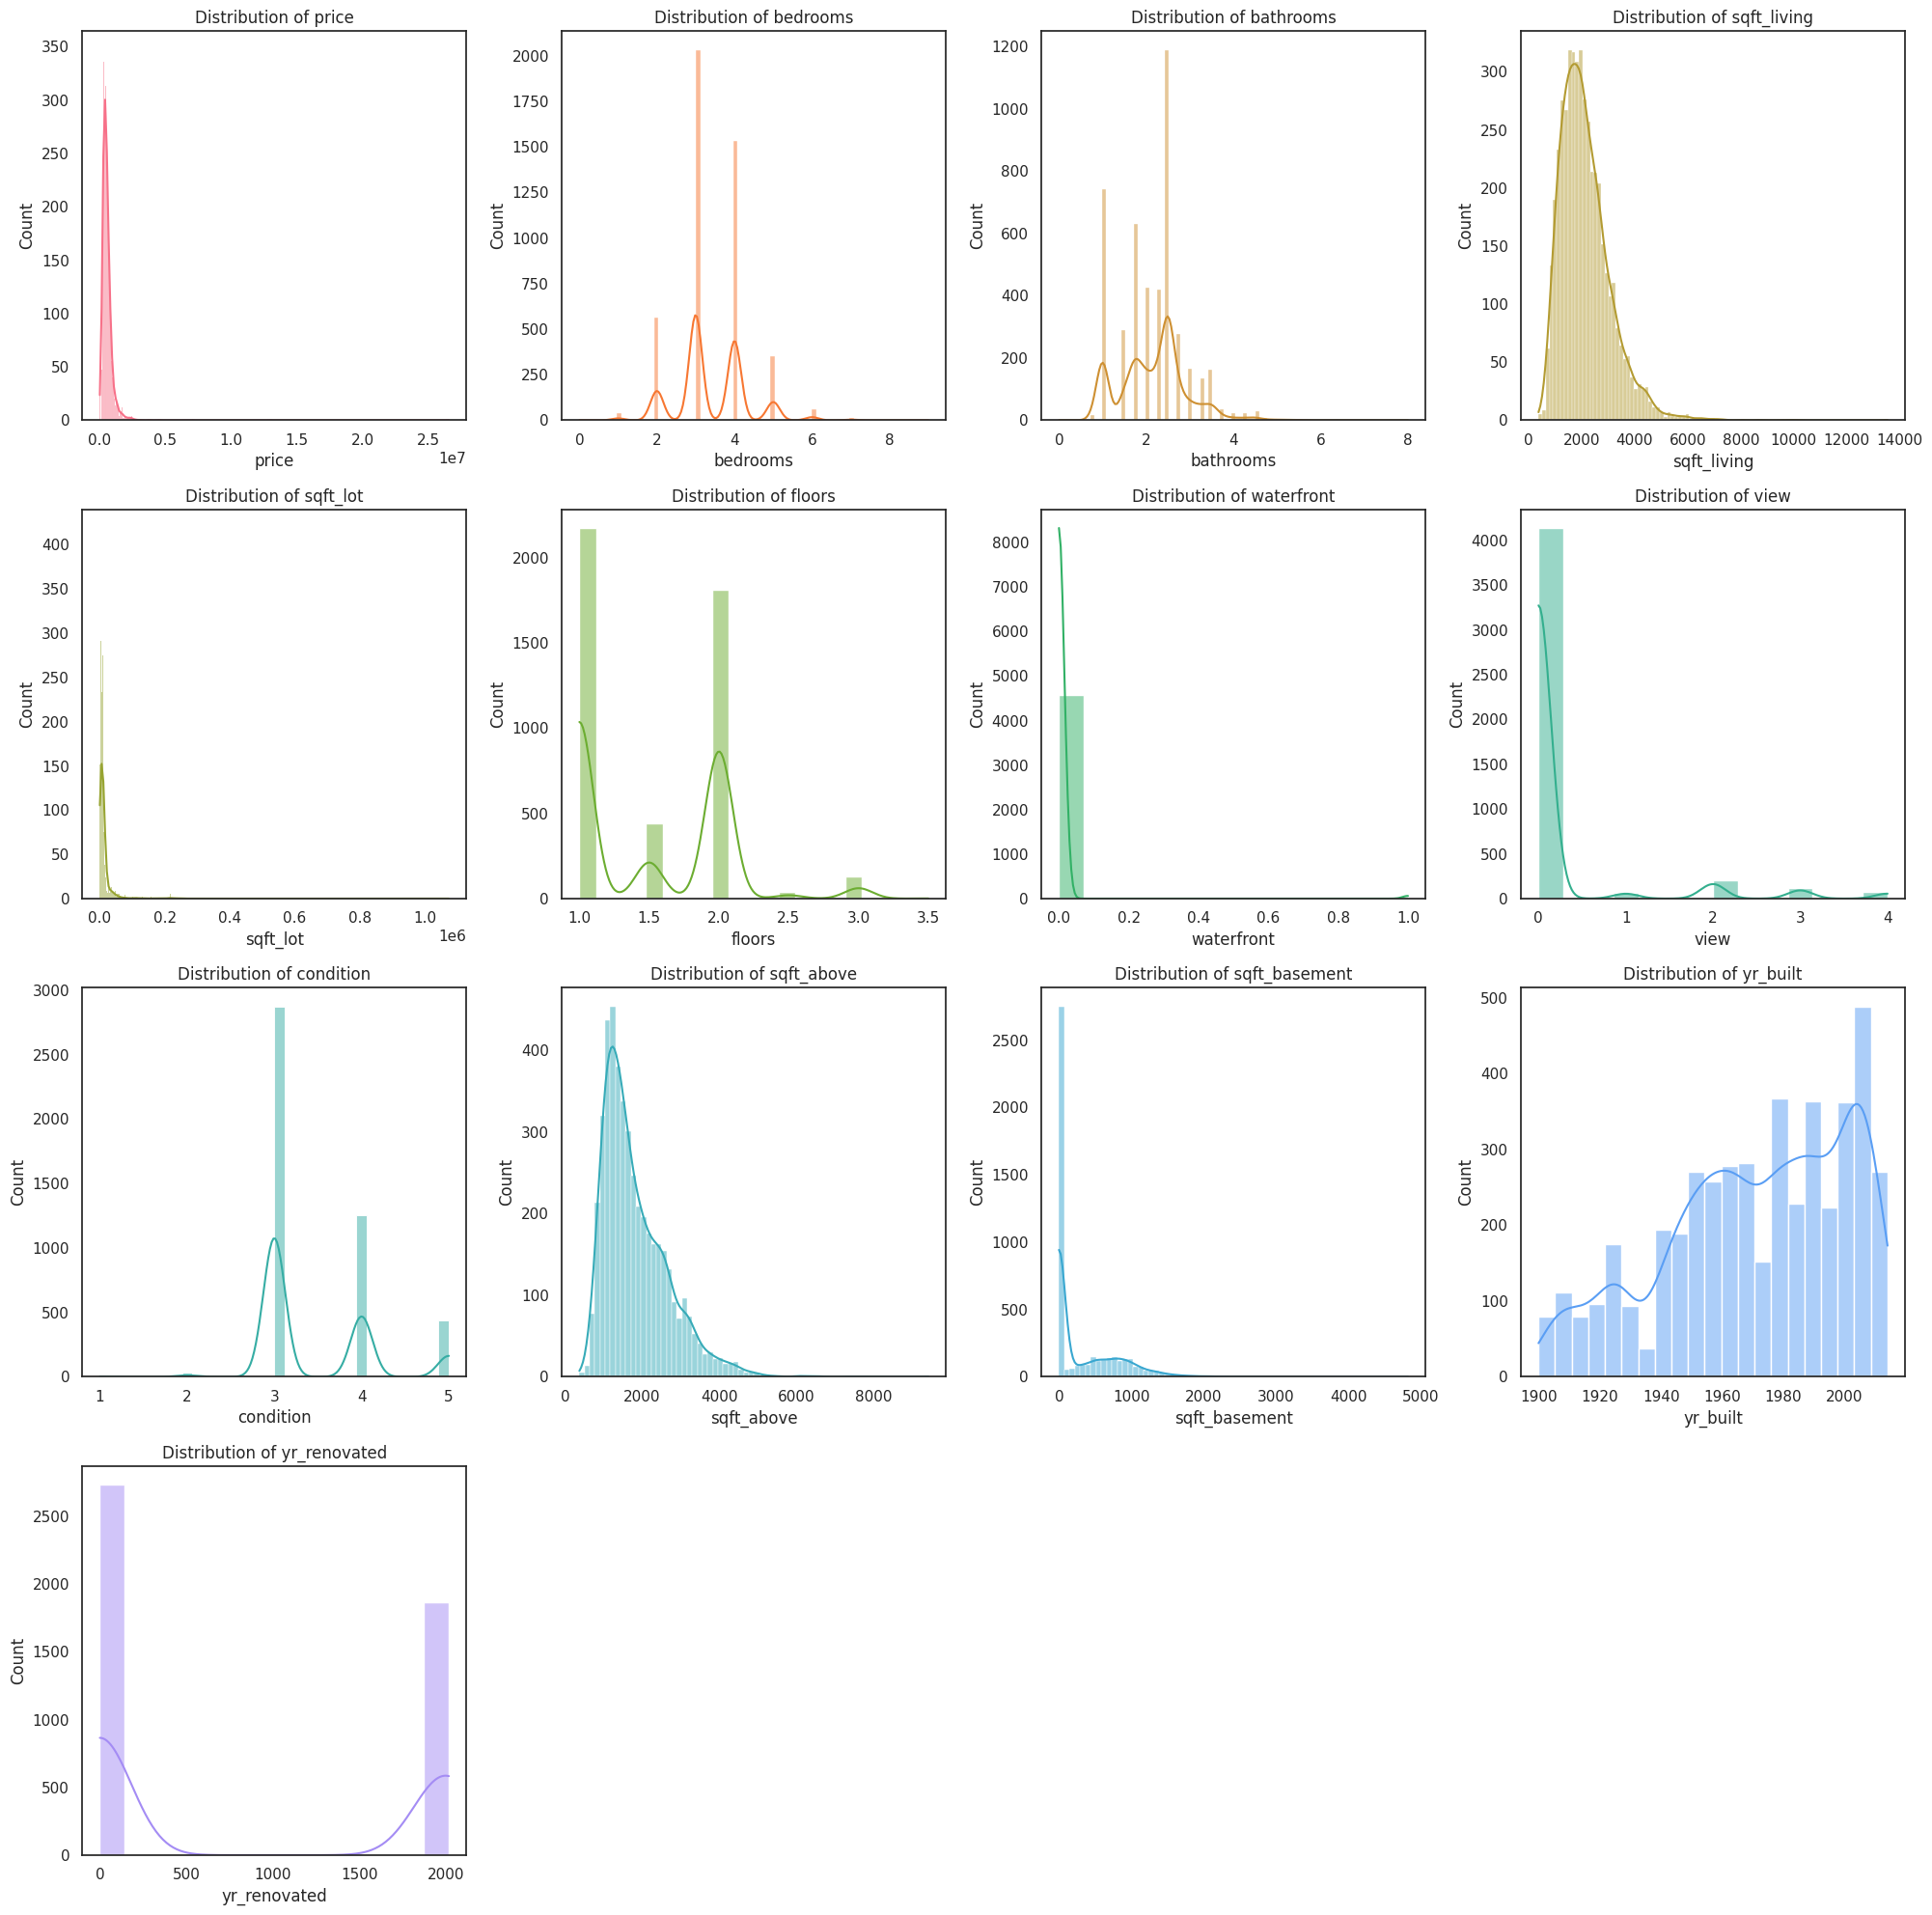

In [21]:
# Create figure and axes
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(colnames_numerical_columns):
    sns.set_style('darkgrid')
    color = palette[i % len(palette)]  # Cycle through color
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, color=color)
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Turn off extra subplots

# Adjust layout
fig.tight_layout()
plt.show()

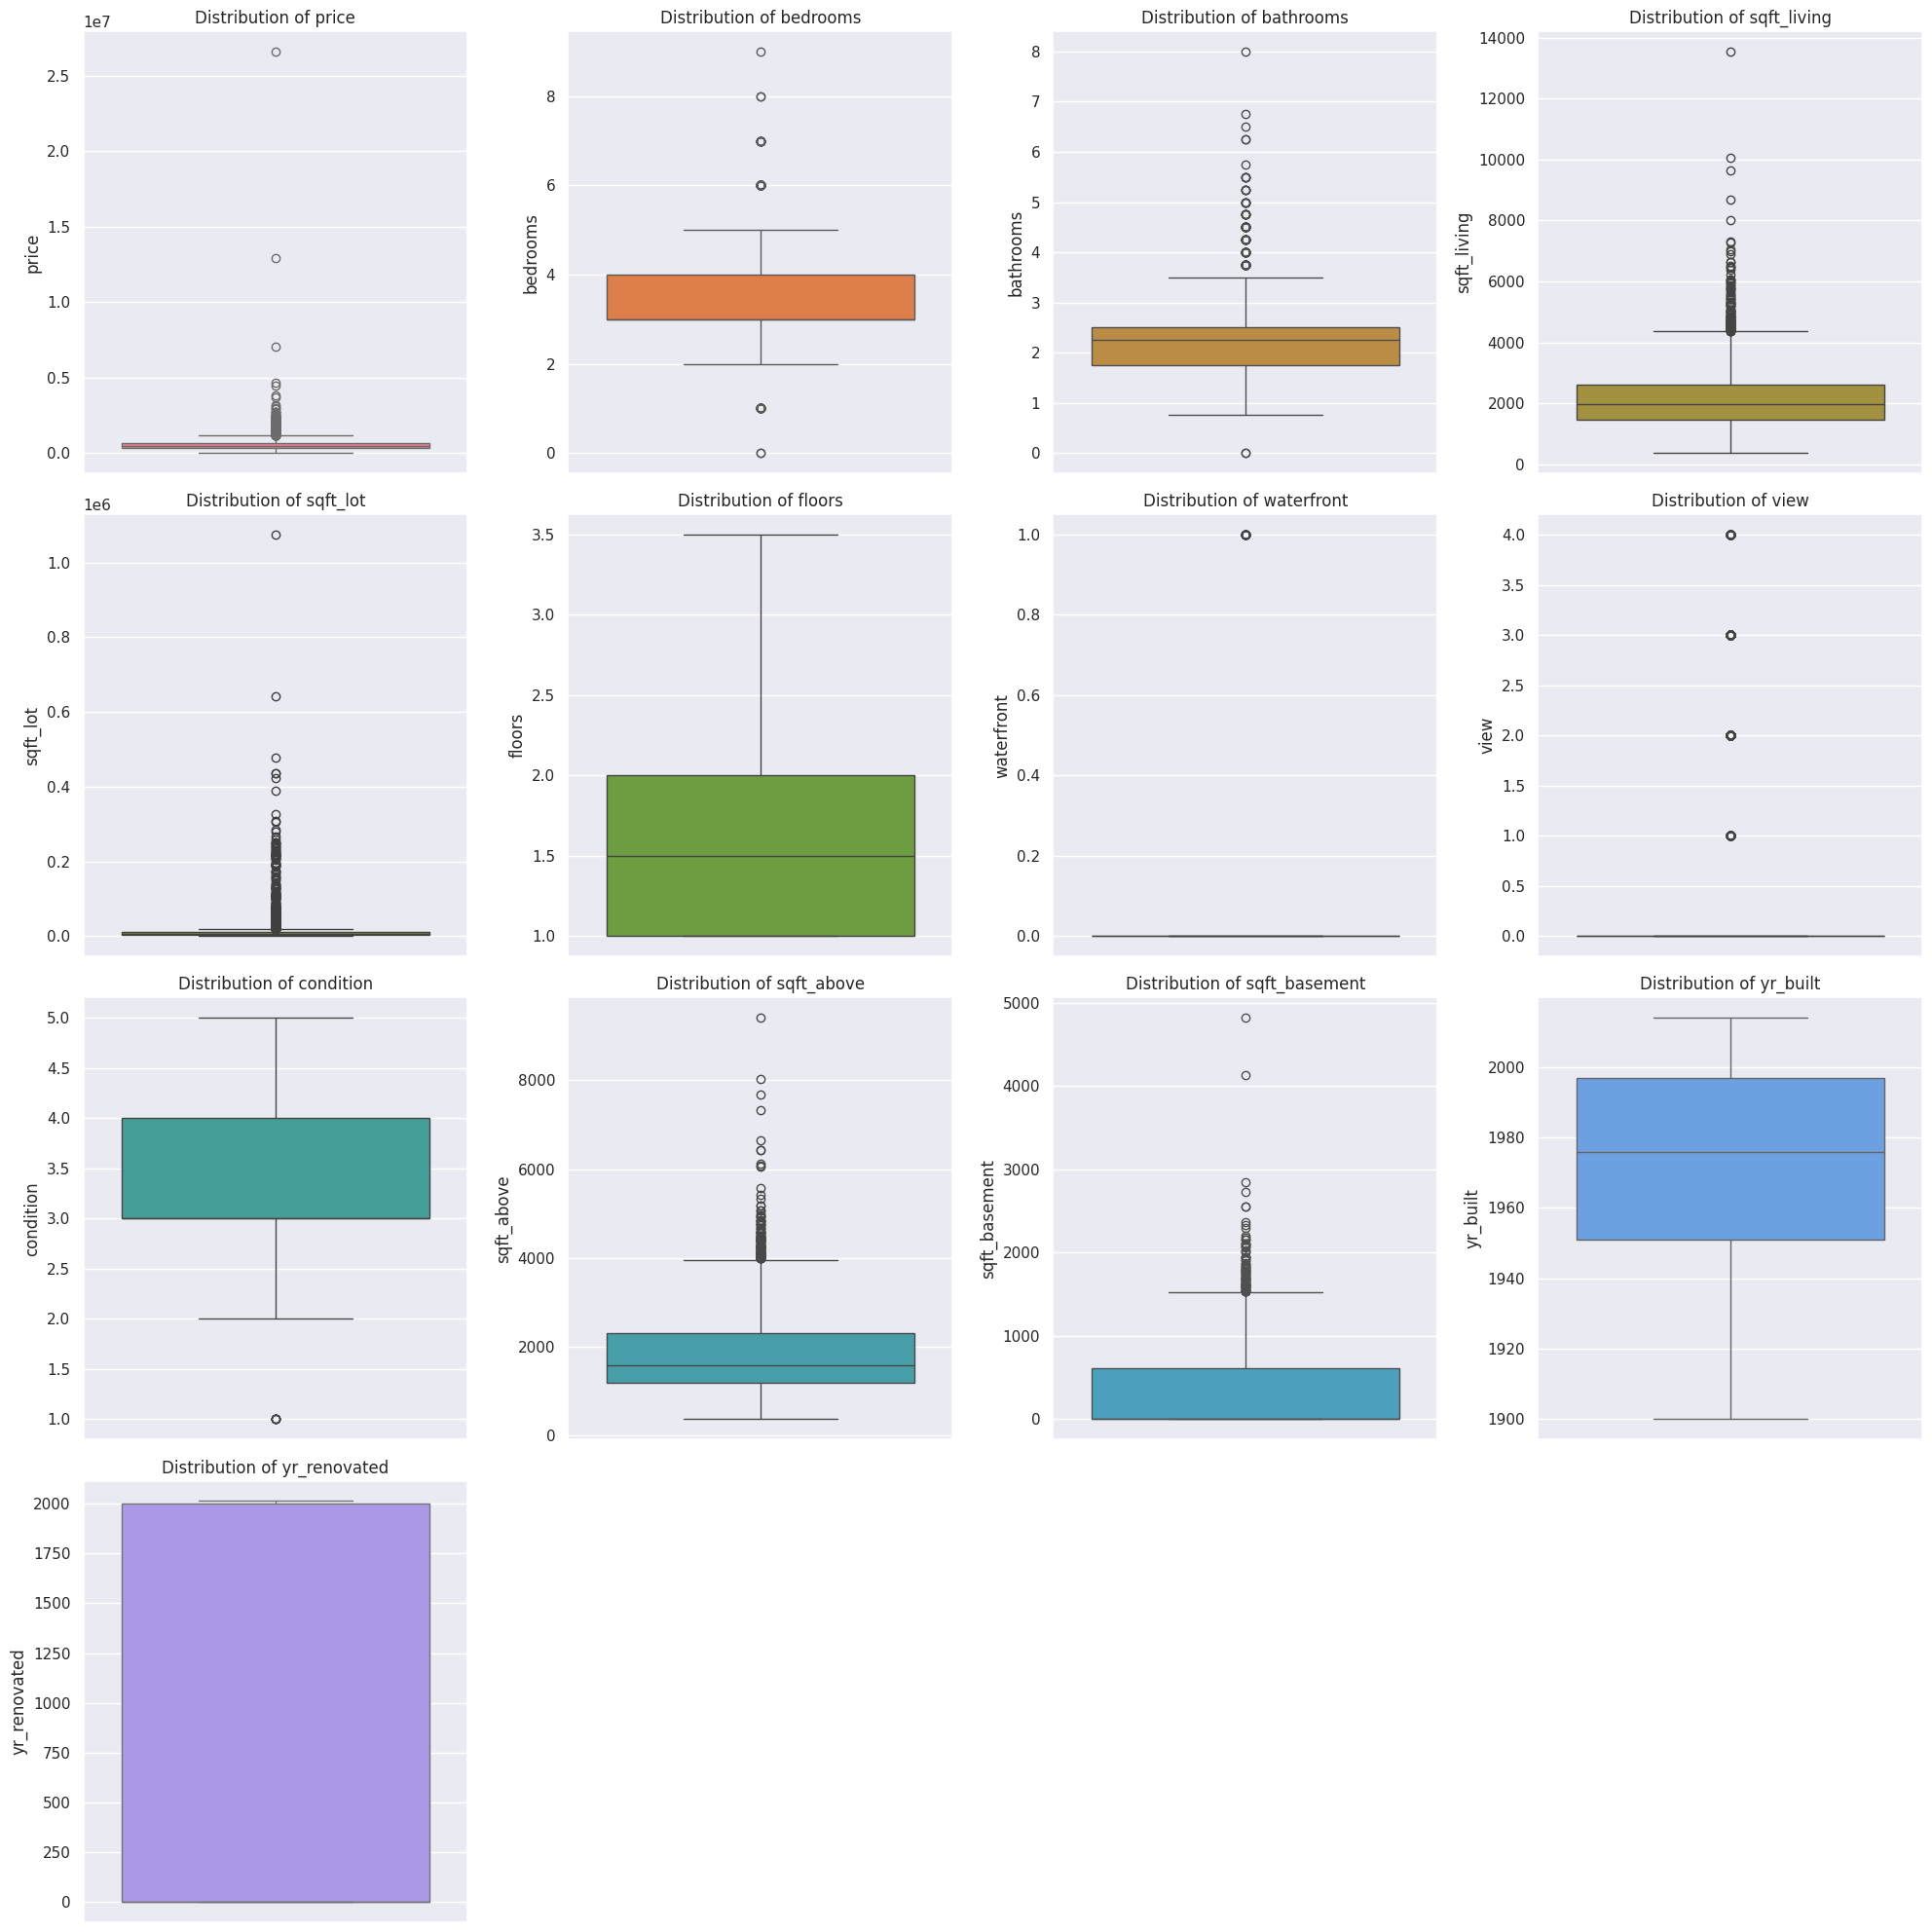

In [22]:
# Create figure and axes
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(colnames_numerical_columns):
    sns.set_style('darkgrid')
    color = palette[i % len(palette)]  # Cycle through color
    sns.boxplot(data=data, y=col, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Turn off extra subplots

# Adjust layout
fig.tight_layout()
plt.show()

In [23]:
# Handling outliers
for col in colnames_numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

In [24]:
cat_col = data.select_dtypes('object').columns.to_list()
cat_col

['street', 'city', 'statezip', 'country']

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [26]:
encoded_cols = encoder.get_feature_names_out(cat_col)
encoded_cols

array(['street_1 View Ln NE', 'street_10 W Etruria St',
       'street_100 20th Ave E', ..., 'statezip_WA 98288',
       'statezip_WA 98354', 'country_USA'], dtype=object)

In [27]:
data[encoded_cols] = encoder.fit_transform(data[cat_col])

In [28]:
data.drop(columns=cat_col , inplace=True)

In [29]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
data.shape

(4600, 4660)

In [31]:
X = data.drop(columns='price')
Y = data['price']

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [33]:
Y = Y.to_numpy()  # Convert Series to NumPy array
Y = Y.reshape(-1, 1)  # Reshape to 2D array for scaling
Y = scaler.fit_transform(Y)  # Scale the target variable

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
# Initialize the Lasso model
lasso_mod = Lasso(alpha=50, max_iter=1000, tol=0.1)

# Fit the model on the training data
lasso_mod.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_mod.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error (Lasso):", mae_lasso)

Mean Absolute Error (Lasso): 0.010447434597158266


In [37]:
y_pred_lasso.min(), y_pred_lasso.max(), y_test.reshape(-1, 1).flatten().min(), y_test.reshape(-1, 1).flatten().max()

(0.02049072090381895, 0.02049072090381895, 0.0, 1.0)

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression (SVR)": SVR()
}

In [39]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2,

    }

In [40]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  R-squared (R2): {metrics['R2']}")
    print("-" * 50)

Linear Regression:
  Mean Absolute Error (MAE): 513990840.8544864
  Mean Squared Error (MSE): 3.072305554628413e+18
  R-squared (R2): -2.1299349456146158e+21
--------------------------------------------------
Ridge Regression:
  Mean Absolute Error (MAE): 0.005762979297261493
  Mean Squared Error (MSE): 0.0013618155074838338
  R-squared (R2): 0.05589519424589362
--------------------------------------------------
Lasso Regression:
  Mean Absolute Error (MAE): 0.010447434597158266
  Mean Squared Error (MSE): 0.0014442308883848994
  R-squared (R2): -0.0012408544693358614
--------------------------------------------------
Support Vector Regression (SVR):
  Mean Absolute Error (MAE): 0.08098201868964752
  Mean Squared Error (MSE): 0.007537752074221704
  R-squared (R2): -4.225691673172678
--------------------------------------------------
